In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Deep learning framework
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

# ML modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
import functools

# P1. CIFAR10 CNN: Training using minibatch gradient descent algorithms

## Data Preparation & Hyperparameter Initialization

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
Note: Input shape is (32, 32, 3)


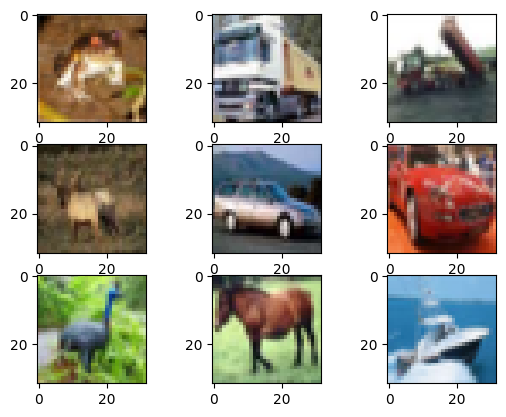

In [ ]:
# Importing dataset
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

print(data_train.shape),print(label_train.shape), print(data_test.shape), print(label_test.shape)
print("Note: Input shape is (32, 32, 3)")

# Normalize to [0, 1] range
data_train, data_test = data_train / 255.0, data_test / 255.0

# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(data_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Hyperparameters
batch_size = 128
learning_rate = 0.001
n_epochs = 100
num_batches = 50  # Only use first 50 mini-batches per epoch

# Mini-batch optimizer names & list
optimizer_names = ['SGD','AdaGrad','RMSprop','Momentum','Adam']

optimizer_list = [
    optimizers.SGD(learning_rate=learning_rate),      # Mini-batch Gradient Descent
    optimizers.Adagrad(learning_rate=learning_rate),  # Mini-batch AdaGrad
    optimizers.RMSprop(learning_rate=learning_rate),  # Mini-batch RMSProp
    optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True), # SGD with momentum and Nesterov acceleration
    optimizers.Adam(learning_rate=learning_rate)      # Mini-batch Adam
]

## Sequential CNN: Without Dropout

**Breakdown of Layers**
1. 3 Convolutional Layers with ReLU activation and max pooling → To extract hierarchical features
2. Fully Connected Layer with 1000 neurons and ReLU activation → To learn complex patterns
3. Output Layer (Dense(10, softmax)) → To classify the input into one of the 10 classes


In [ ]:
model = Sequential()

# Convolution Layer 1 + Max Pooling
model.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1), input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution Layer 2 + Max Pooling
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution Layer 3 + Max Pooling
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

# Fully connected dense layer
model.add(Dense(1000, activation="relu"))

# Output layer
model.add(Dense(10, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training for model with dropout
hist_loss_nn = []

for item, name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Doing %s optimizer" %str(name))
    print("-----------------------------")

    model.compile(optimizer=item, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size,
                        shuffle=True, steps_per_epoch=50, validation_data=(data_test, label_test))

    hist_loss_nn.append(history.history['loss'])

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.1153 - loss: 2.3041 - val_accuracy: 0.1014 - val_loss: 2.3038
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1088 - loss: 2.3036 - val_accuracy: 0.1011 - val_loss: 2.3031
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0993 - loss: 2.3030 - val_accuracy: 0.1018 - val_loss: 2.3024
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1007 - loss: 2.3024 - val_accuracy: 0.1062 - val_loss: 2.3016
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1054 - loss: 2.3012 - val_accuracy: 0.1080 - val_loss: 2.3010
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1135 - loss: 2.3008 - val_accuracy: 0.1095 - val_loss: 2.3005
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1147 - loss: 2.3013 - val_accuracy: 0.1111 - val_loss: 2.3000
Epoch 8/100
41/50 ━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1115 - loss: 2.2992 - val_accuracy: 0.1113 - val_loss: 2.2996
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1149 - loss: 2.2993 - val_accuracy: 0.1116 - val_loss: 2.2990
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1129 - loss: 2.3000 - val_accuracy: 0.1156 - val_loss: 2.2985
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1124 - loss: 2.2980 - val_accuracy: 0.1165 - val_loss: 2.2981
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1232 - loss: 2.2974 - val_accuracy: 0.1203 - val_loss: 2.2975
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1257 - loss: 2.2970 - val_accuracy: 0.1242 - val_loss: 2.2970
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1221 - loss: 2.2978 - val_accuracy: 0.1303 - val_loss: 2.2965
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1312 - loss: 2.2963 - val_accuracy: 0.1285 -

In [ ]:
# Printing dataframe for security
df_loss = pd.DataFrame(hist_loss_nn).T
df_loss.columns = optimizer_names
df_loss.index = range(1, n_epochs + 1)
df_loss.index.name = 'Epoch'
df_loss.to_csv('hist_loss_nn.csv')

## Sequential CNN: With Dropout

**Breakdown of Layers**
1. 3 Convolutional Layers with ReLU activation and max pooling → To extract hierarchical features
2. Fully Connected Layer with 1000 neurons and ReLU activation → To learn complex patterns
3. Dropout layer with a rate of 0.5 before the output layer → To combat overfitting
4. Output Layer (Dense(10, softmax)) → To classify the input into one of the 10 classes

In [ ]:
model_dropout = Sequential()

# Convolution Layer 1 + Max Pooling
model_dropout.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1), input_shape=(32, 32, 3)))
model_dropout.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution Layer 2 + Max Pooling
model_dropout.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1)))
model_dropout.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution Layer 3 + Max Pooling
model_dropout.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1)))
model_dropout.add(MaxPooling2D(pool_size=(2,2), strides=2))

model_dropout.add(Flatten())

# Fully connected dense layer
model_dropout.add(Dense(1000, activation="relu"))

model_dropout.add(Dropout(0.5))

# Output layer
model_dropout.add(Dense(10, activation="softmax"))
model_dropout.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training for model with dropout
hist_loss_nn_dropout = []

for item, name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Doing %s optimizer" %str(name))
    print("-----------------------------")

    model_dropout.compile(optimizer=item, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    history_dropout = model_dropout.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size,
                                        shuffle=True, steps_per_epoch=50, validation_data=(data_test, label_test))

    hist_loss_nn_dropout.append(history_dropout.history['loss'])

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.1044 - loss: 2.3056 - val_accuracy: 0.1058 - val_loss: 2.2987
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1086 - loss: 2.3050 - val_accuracy: 0.1051 - val_loss: 2.2963
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1049 - loss: 2.3007 - val_accuracy: 0.1041 - val_loss: 2.2943
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1062 - loss: 2.3017 - val_accuracy: 0.1054 - val_loss: 2.2926
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1156 - loss: 2.2985 - val_accuracy: 0.1108 - val_loss: 2.2912
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1143 - loss: 2.2965 - val_accuracy: 0.1166 - val_loss: 2.2897
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1193 - loss: 2.2916 - val_accuracy: 0.1179 - val_loss: 2.2884
Epoch 8/100
41/50 ━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1097 - loss: 2.2933 - val_accuracy: 0.1225 - val_loss: 2.2874
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.1190 - loss: 2.2906 - val_accuracy: 0.1276 - val_loss: 2.2862
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1266 - loss: 2.2887 - val_accuracy: 0.1371 - val_loss: 2.2850
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1258 - loss: 2.2863 - val_accuracy: 0.1378 - val_loss: 2.2837
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1245 - loss: 2.2881 - val_accuracy: 0.1473 - val_loss: 2.2826
Epoch 13/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1276 - loss: 2.2887 - val_accuracy: 0.1492 - val_loss: 2.2815
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1246 - loss: 2.2858 - val_accuracy: 0.1501 - val_loss: 2.2803
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1397 - loss: 2.2812 - val_accuracy: 0.1507 

In [ ]:
# Printing dataframe for security
df_loss = pd.DataFrame(hist_loss_nn_dropout).T
df_loss.columns = optimizer_names
df_loss.index = range(1, n_epochs + 1)
df_loss.index.name = 'Epoch'
df_loss.to_csv('hist_loss_nn_dropout.csv')

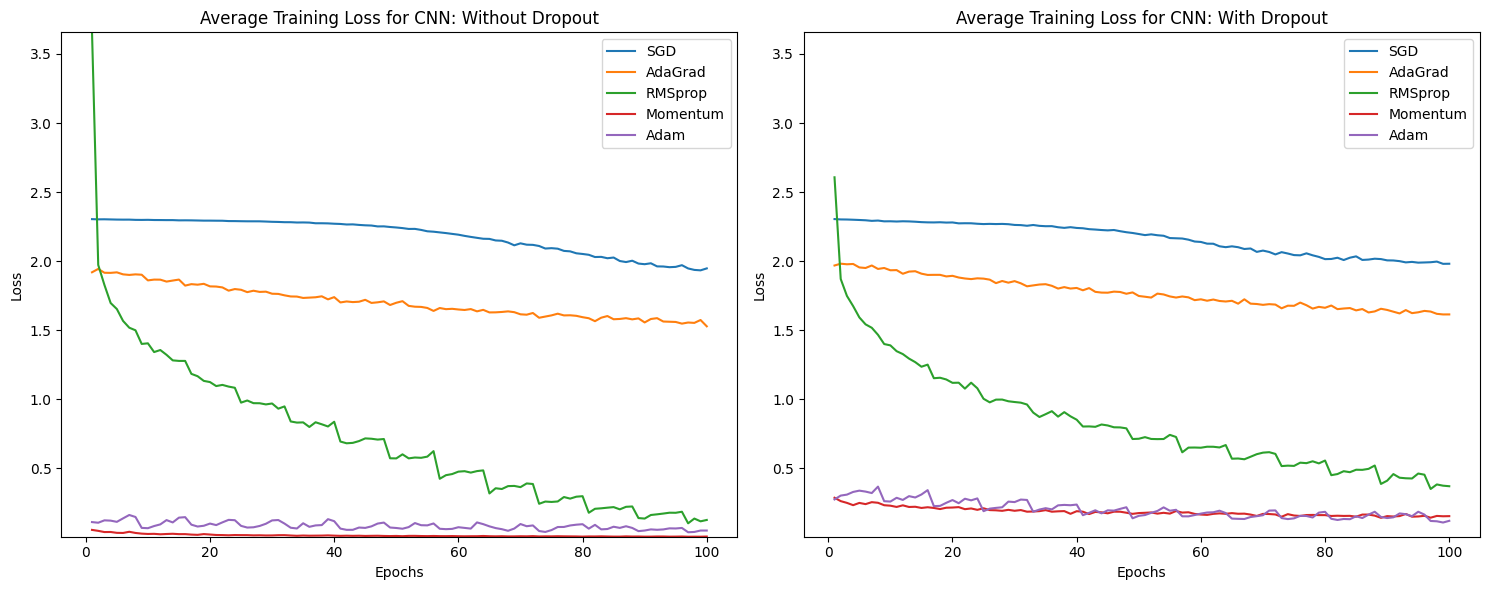

In [ ]:
# Comparison Plot
df_loss_nn = pd.read_csv("/content/hist_loss_nn.csv", index_col=0)
df_loss_nn_dropout = pd.read_csv("/content/hist_loss_nn_dropout.csv", index_col=0)

plt.figure(figsize=(15, 6))

# First plot
plt.subplot(1, 2, 1)
for optimizer in df_loss_nn.columns:
    plt.plot(df_loss_nn.index, df_loss_nn[optimizer], label=optimizer)

plt.title('Average Training Loss for CNN: Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.legend()

# Second plot
plt.subplot(1, 2, 2)
for optimizer in df_loss_nn_dropout.columns:
    plt.plot(df_loss_nn_dropout.index, df_loss_nn_dropout[optimizer], label=optimizer)

plt.title('Average Training Loss for CNN: With Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(False)
plt.legend()

# Set the same y-axis limits for both plots
y_min = min(df_loss.min().min(), df_loss_nn.min().min())
y_max = max(df_loss.max().max(), df_loss_nn.max().max())

# Apply the same limits to both subplots
plt.subplot(1, 2, 1)
plt.ylim(y_min, y_max)

plt.subplot(1, 2, 2)
plt.ylim(y_min, y_max)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

## Analysis & Conclusion

The graphs compare the average training loss for a CNN model without dropout (left) and with dropout (right) across different optimizers: SGD, AdaGrad, RMSprop, Momentum, and Adam. When scaling the y-axis for the average training loss for the two CNN models, the CNN without dropout appears to have lower training loss on average.

1. I**mpact of Dropout:** The average training losses are consistently lower in the model without dropout, suggesting that this model has a faster learning mechanism but could be prone to overfitting, so caution is required. For the dropout model, the average training losses are slightly higher - this could be due to the dropout layers underfitting the model and thus leading to a higher training loss on average. Conversely, it could also mean that the dropout is regulating the model and preventing it from memorizing the training data and thus promoting better generalization.

2. **Optimizer Performance:** SGD with momentum achieves the lowest training loss and fastest convergence in both models, indicating that it is well-suited for this architecture. Adam and RMSprop also perform well, converging faster than SGD and AdaGrad, with RMSprop showing a steady decrease in loss. SGD and AdaGrad, which exhibit the slowest convergence, with SGD having the highest training loss, indicating that a constant learning rate is less effective for this task.

3. **Overall observations:**
The dropout layer introduces noise during model training to prevent overfitting. This impacts the optimizers' performance by slightly increasing the training loss and slower convergence - it requires more epochs for convergence, especially for RMSprop. Therefore, the CNN without dropout and Momentum remains the best choice as it offers both high convergence speed and best training loss minimization.

# P2. CIFAR10 Image Classification

# Sequential CNN Models

## Data Preparation & Hyperparamter Initialization

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
Note: Input shape is (32, 32, 3)


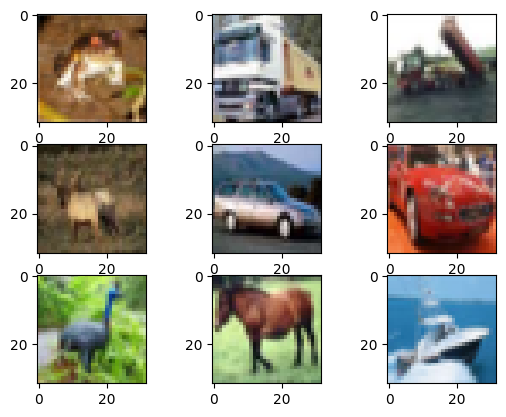

In [ ]:
# Importing dataset
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
print("X_train shape:", data_train.shape)
print("X_test shape:", data_test.shape)
print("y_train shape:", label_train.shape)
print("y_test shape:", label_test.shape)
print("Note: Input shape is (32, 32, 3)")

# Normalize to [0, 1] range
data_train, data_test = data_train / 255.0, data_test / 255.0

# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(data_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# Mini-batch optimizer names & list
optimizer_names = ['SGD','AdaGrad','RMSprop','Momentum','Adam']
learning_rate = 0.001

optimizer_list = [
    optimizers.SGD(learning_rate=learning_rate),      # Mini-batch Gradient Descent
    optimizers.Adagrad(learning_rate=learning_rate),  # Mini-batch AdaGrad
    optimizers.RMSprop(learning_rate=learning_rate),  # Mini-batch RMSProp
    optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True), # SGD with momentum and Nesterov acceleration
    optimizers.Adam(learning_rate=learning_rate)      # Mini-batch Adam
]

## Model Architecture

 This Sequential CNN is designed for classifying CIFAR-10 images and incorporates dropout, early stopping, L2 regularization and 5 optimizers (SGD, AdaGrad, RMSprop, Momentum, Adam) as training methods, to enhance generalization and prevent overfitting.

1.   The architecture consists of three convolutional layers, each followed by max-pooling to progressively reduce spatial dimensions while capturing complex features. The model employs 16, 32, and 64 filters in the convolutional layers with ReLU activations for non-linearity.

2.   L2 regularization is applied to convolutional and dense layers, promoting weight sparsity and reducing model complexity, considering the massive size of the training dataset.

3.   The fully connected layer consists of 1000 neurons with ReLU activation, followed by a Dropout layer (rate of 0.5) to further combat overfitting. The final layer is a softmax classifier for the 10 CIFAR-10 categories.

4.   Early stopping monitors validation loss, halting training when performance no longer improves, ensuring optimal generalization.

In [ ]:
from tensorflow.keras import regularizers, callbacks

def build_compile(dropout=False, regularization=False):
    model = Sequential()

    # Convolution Layer 1 + Max Pooling
    model.add(Conv2D(filters=16, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1), input_shape=(32, 32, 3),
                     kernel_regularizer=regularizers.l2(0.001) if regularization else None))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Convolution Layer 2 + Max Pooling
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1),
                     kernel_regularizer=regularizers.l2(0.001) if regularization else None))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    # Convolution Layer 3 + Max Pooling
    model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding="same", strides=(1,1),
                     kernel_regularizer=regularizers.l2(0.001) if regularization else None))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))

    model.add(Flatten())

    # Fully connected dense layer
    model.add(Dense(1000, activation="relu", kernel_regularizer=regularizers.l2(0.001) if regularization else None))

    # Dropout to combat overfitting, if specified
    if dropout:
        model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(10, activation="softmax"))

    model.summary()
    return model

## Training Sequential CNN Models

In [ ]:
def train_model(model, model_name='model', early_stopping=False):
    # Hyperparams
    n_epochs = 50
    batch_size = 128

    # Arrays to store training and validation performance
    hist_acc_nn = []
    hist_val_acc_nn = []
    hist_loss_nn = []
    hist_val_loss_nn = []
    top5_acc_nn = []
    val_top5_acc_nn = []

    start = time.time()

    top5_acc = keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top5_acc")

    # Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
    for item, name in zip(optimizer_list, optimizer_names):
        print("-----------------------------")
        print("Doing %s optimizer" %str(name))
        print("-----------------------------")

        # Get the model from function above & train model
        model.compile(optimizer=item, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy', top5_acc])

        if early_stopping:
          es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
          history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size, validation_data=(data_test, label_test), callbacks=[es])
        else:
          history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size, validation_data=(data_test, label_test))

        # Store the performance: Without dropout
        hist_acc_nn.append(history.history['accuracy'])
        hist_val_acc_nn.append(history.history['val_accuracy'])
        hist_loss_nn.append(history.history['loss'])
        hist_val_loss_nn.append(history.history['val_loss'])
        top5_acc_nn.append(history.history['top5_acc'])
        val_top5_acc_nn.append(history.history['val_top5_acc'])

        print("-----------------------------")

    end = time.time()
    time_nn = (end-start) / 60
    print('minutes to run: ', time_nn)

    top1_err_nn = [[1 - acc for acc in optimizer] for optimizer in hist_acc_nn]
    val_top1_err_nn = [[1 - acc for acc in optimizer] for optimizer in hist_val_acc_nn]

    top5_err_nn = [[1 - acc for acc in optimizer] for optimizer in top5_acc_nn]
    val_top5_err_nn = [[1 - acc for acc in optimizer] for optimizer in val_top5_acc_nn]

    # Prepare data for DataFrame
    data_dict = {
        "Epoch": [],
        "Optimizer": [],
        "Train_Accuracy": [],
        "Val_Accuracy": [],
        "Train_Loss": [],
        "Val_Loss": [],
        "Top1_Train_Error": [],
        "Top1_Val_Error": [],
        "Top5_Train_Error": [],
        "Top5_Val_Error": [],
    }

    for i, optimizer_name in enumerate(optimizer_names):
        n_epochs = len(hist_acc_nn[i])

        for epoch in range(n_epochs):
            data_dict["Epoch"].append(epoch + 1)
            data_dict["Optimizer"].append(optimizer_name)
            data_dict["Train_Accuracy"].append(hist_acc_nn[i][epoch])
            data_dict["Val_Accuracy"].append(hist_val_acc_nn[i][epoch])
            data_dict["Train_Loss"].append(hist_loss_nn[i][epoch])
            data_dict["Val_Loss"].append(hist_val_loss_nn[i][epoch])
            data_dict["Top1_Train_Error"].append(top1_err_nn[i][epoch])
            data_dict["Top1_Val_Error"].append(val_top1_err_nn[i][epoch])
            data_dict["Top5_Train_Error"].append(top5_err_nn[i][epoch])
            data_dict["Top5_Val_Error"].append(val_top5_err_nn[i][epoch])

    # Convert the dictionary into a DataFrame
    df = pd.DataFrame(data_dict)
    df.to_csv(f"{model_name}.csv", index=False)

### Sequential CNN

In [ ]:
# Sequential CNN
model_1_1 = build_compile(dropout=False, regularization=False)
train_model(model_1_1, 'seq_cnn', early_stopping=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1056 - loss: 2.3044 - top5_acc: 0.5246 - val_accuracy: 0.1099 - val_loss: 2.2909 - val_top5_acc: 0.5923
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1098 - loss: 2.2873 - top5_acc: 0.6105 - val_accuracy: 0.1181 - val_loss: 2.2766 - val_top5_acc: 0.6162
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1220 - loss: 2.2727 - top5_acc: 0.6235 - val_accuracy: 0.1486 - val_loss: 2.2575 - val_top5_acc: 0.6420
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1581 - loss: 2.2510 - top5_acc: 0.6524 - val_accuracy: 0.1877 - val_loss: 2.2255 - val_top5_acc: 0.6833
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2037 - loss: 2.2134 - top5_acc: 0.6977 - val_accuracy: 0.2352 - val_loss: 2.1715 - val_top5_acc: 0.7331
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.234

### Sequential CNN + Dropout

In [ ]:
# Sequential CNN + Dropout
model_1_2 = build_compile(dropout=True, regularization=False)
train_model(model_1_2, 'seq_cnn_drop', early_stopping=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1006 - loss: 2.3060 - top5_acc: 0.5063 - val_accuracy: 0.1286 - val_loss: 2.2939 - val_top5_acc: 0.5731
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1177 - loss: 2.2957 - top5_acc: 0.5436 - val_accuracy: 0.1710 - val_loss: 2.2866 - val_top5_acc: 0.6453
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1352 - loss: 2.2874 - top5_acc: 0.5781 - val_accuracy: 0.2076 - val_loss: 2.2766 - val_top5_acc: 0.6963
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1550 - loss: 2.2782 - top5_acc: 0.6035 - val_accuracy: 0.2283 - val_loss: 2.2607 - val_top5_acc: 0.7297
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1743 - loss: 2.2607 - top5_acc: 0.6372 - val_accuracy: 0.2278 - val_loss: 2.2317 - val_top5_acc: 0.7398
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.191

### Sequential CNN + Regularization

In [ ]:
model_1_3 = build_compile(dropout=False, regularization=True)
train_model(model_1_3, 'seq_cnn_reg', early_stopping=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1218 - loss: 3.3785 - top5_acc: 0.5242 - val_accuracy: 0.1347 - val_loss: 3.3654 - val_top5_acc: 0.5624
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1372 - loss: 3.3618 - top5_acc: 0.5731 - val_accuracy: 0.1471 - val_loss: 3.3486 - val_top5_acc: 0.5986
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1575 - loss: 3.3434 - top5_acc: 0.6167 - val_accuracy: 0.2047 - val_loss: 3.3234 - val_top5_acc: 0.6566
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2081 - loss: 3.3154 - top5_acc: 0.6635 - val_accuracy: 0.2375 - val_loss: 3.2818 - val_top5_acc: 0.6909
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2391 - loss: 3.2674 - top5_acc: 0.7069 - val_accuracy: 0.2568 - val_loss: 3.2219 - val_top5_acc: 0.7401
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.25

### Sequential CNN + Dropout + Early Stopping

In [ ]:
model_1_4 = build_compile(dropout=True, regularization=False)
train_model(model_1_4, 'seq_cnn_drop_es', early_stopping=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.0993 - loss: 2.3113 - top5_acc: 0.5040 - val_accuracy: 0.1378 - val_loss: 2.2947 - val_top5_acc: 0.5708
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1169 - loss: 2.2958 - top5_acc: 0.5419 - val_accuracy: 0.1697 - val_loss: 2.2865 - val_top5_acc: 0.5983
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1344 - loss: 2.2877 - top5_acc: 0.5697 - val_accuracy: 0.1830 - val_loss: 2.2767 - val_top5_acc: 0.6208
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1515 - loss: 2.2764 - top5_acc: 0.5948 - val_accuracy: 0.2184 - val_loss: 2.2626 - val_top5_acc: 0.6727
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1662 - loss: 2.2626 - top5_acc: 0.6260 - val_accuracy: 0.2394 - val_loss: 2.2394 - val_top5_acc: 0.7066
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.18

### Sequential CNN + Regularization + Early Stopping

In [ ]:
model_1_5 = build_compile(dropout=False, regularization=True)
train_model(model_1_5, 'seq_cnn_reg_es', early_stopping=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0962 - loss: 3.3812 - top5_acc: 0.5317 - val_accuracy: 0.1160 - val_loss: 3.3708 - val_top5_acc: 0.5255
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1204 - loss: 3.3672 - top5_acc: 0.5386 - val_accuracy: 0.1433 - val_loss: 3.3577 - val_top5_acc: 0.5529
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1422 - loss: 3.3533 - top5_acc: 0.5717 - val_accuracy: 0.1582 - val_loss: 3.3403 - val_top5_acc: 0.6004
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1621 - loss: 3.3335 - top5_acc: 0.6208 - val_accuracy: 0.1942 - val_loss: 3.3127 - val_top5_acc: 0.6773
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1992 - loss: 3.3006 - top5_acc: 0.6784 - val_accuracy: 0.2219 - val_loss: 3.2659 - val_top5_acc: 0.7218
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.225

### Sequential CNN + Early Stopping

In [ ]:
model_1_6 = build_compile(dropout=False, regularization=False)
train_model(model_1_6, 'seq_cnn_es', early_stopping=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,100,322 (4.20 MB)

 Trainable params: 1,100,322 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1188 - loss: 2.2998 - top5_acc: 0.5172 - val_accuracy: 0.1158 - val_loss: 2.2927 - val_top5_acc: 0.5413
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1089 - loss: 2.2907 - top5_acc: 0.5426 - val_accuracy: 0.1032 - val_loss: 2.2837 - val_top5_acc: 0.5584
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1119 - loss: 2.2806 - top5_acc: 0.5677 - val_accuracy: 0.1259 - val_loss: 2.2718 - val_top5_acc: 0.5806
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1329 - loss: 2.2679 - top5_acc: 0.5899 - val_accuracy: 0.1424 - val_loss: 2.2539 - val_top5_acc: 0.6150
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1570 - loss: 2.2477 - top5_acc: 0.6353 - val_accuracy: 0.1736 - val_loss: 2.2243 - val_top5_acc: 0.6676
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.193

## Analyzing Sequential CNN Models

In [9]:
# List of dataframes and corresponding model names
dataframes = [
    (pd.read_csv("/content/seq_cnn.csv"), "seq_cnn"),
    (pd.read_csv("/content/seq_cnn_drop.csv"), "seq_cnn_drop"),
    (pd.read_csv("/content/seq_cnn_reg.csv"), "seq_cnn_reg"),
    (pd.read_csv("/content/seq_cnn_drop_es.csv"), "seq_cnn_drop_es"),
    (pd.read_csv("/content/seq_cnn_reg_es.csv"), "seq_cnn_reg_es"),
    (pd.read_csv("/content/seq_cnn_es.csv"), "seq_cnn_es")
]

optimizer_names = ['SGD','AdaGrad','RMSprop','Momentum','Adam']

# Columns to average
columns_to_avg = ['Train_Accuracy', 'Val_Accuracy', 'Train_Loss', 'Val_Loss', 'Top1_Train_Error', 'Top1_Val_Error', 'Top5_Train_Error', 'Top5_Val_Error']
results = []

for df, model_name in dataframes:
    for optimizer in optimizer_names:
        df_opt = df[df['Optimizer'] == optimizer]

        # Compute the average for each column
        avg_values = df_opt[columns_to_avg].mean().to_dict()
        avg_values['Model'] = f"{model_name}_{optimizer}"

        results.append(avg_values)

df_summary = pd.DataFrame(results)


# Columns for the two separate dataframes
train_columns = ['Model', 'Train_Loss', 'Top1_Train_Error', 'Top5_Train_Error']
val_columns = ['Model', 'Val_Loss', 'Top1_Val_Error', 'Top5_Val_Error']

df_train_metrics = df_summary[train_columns]
df_val_metrics = df_summary[val_columns]

# Display the tables side by side
from IPython.core.display import display_html

# Apply formatting only to numerical columns
styled_train = df_train_metrics.style \
    .format({'Train_Loss': "{:.4f}", 'Top1_Train_Error': "{:.4f}", 'Top5_Train_Error': "{:.4f}"}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}, {'selector': 'td', 'props': [('text-align', 'left')]}])

styled_val = df_val_metrics.style \
    .format({'Val_Loss': "{:.4f}", 'Top1_Val_Error': "{:.4f}", 'Top5_Val_Error': "{:.4f}"}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}, {'selector': 'td', 'props': [('text-align', 'left')]}])

display_html(
    f"""
    <div style="display: flex; justify-content: space-around;">
        <div>{styled_train.to_html()}</div>
        <div>{styled_val.to_html()}</div>
    </div>
    """,
    raw=True
)


,Model,Train_Loss,Top1_Train_Error,Top5_Train_Error
0,seq_cnn_SGD,1.6856,0.6018,0.1403
1,seq_cnn_AdaGrad,1.2192,0.4252,0.0518
2,seq_cnn_RMSprop,0.2000,0.0661,0.0049
3,seq_cnn_Momentum,0.0005,0.0001,0.0001
4,seq_cnn_Adam,0.0554,0.0143,0.0001
5,seq_cnn_drop_SGD,1.8108,0.6575,0.1732
6,seq_cnn_drop_AdaGrad,1.3590,0.4838,0.0647
7,seq_cnn_drop_RMSprop,0.3696,0.1230,0.0069
8,seq_cnn_drop_Momentum,0.0287,0.0089,0.0001
9,seq_cnn_drop_Adam,0.1204,0.0352,0.0002


### Based on these models, we proceed with the three best model architectures + training methods which give the highest accuracy on the test (val) set, or equivalently give the lowest top-1 test (val) error rate.

2. **Sequential CNN with Momentum + regularization:** Test Accuracy = 75.19, Test Top-1 Error Rate = 0.2481, Test Top-5 Error Rate = 0.0208
3. **Sequential CNN with Momentum + regularization + early stopping:** Test Accuracy = 75.16, Test Top-1 Error Rate = 0.2484, Test Top-5 Error Rate = 0.0202
1. **Sequential CNN with Momentum:** Test Accuracy = 69.57, Test Top-1 Error Rate = 0.3043, Test Top-5 Error Rate = 0.0338

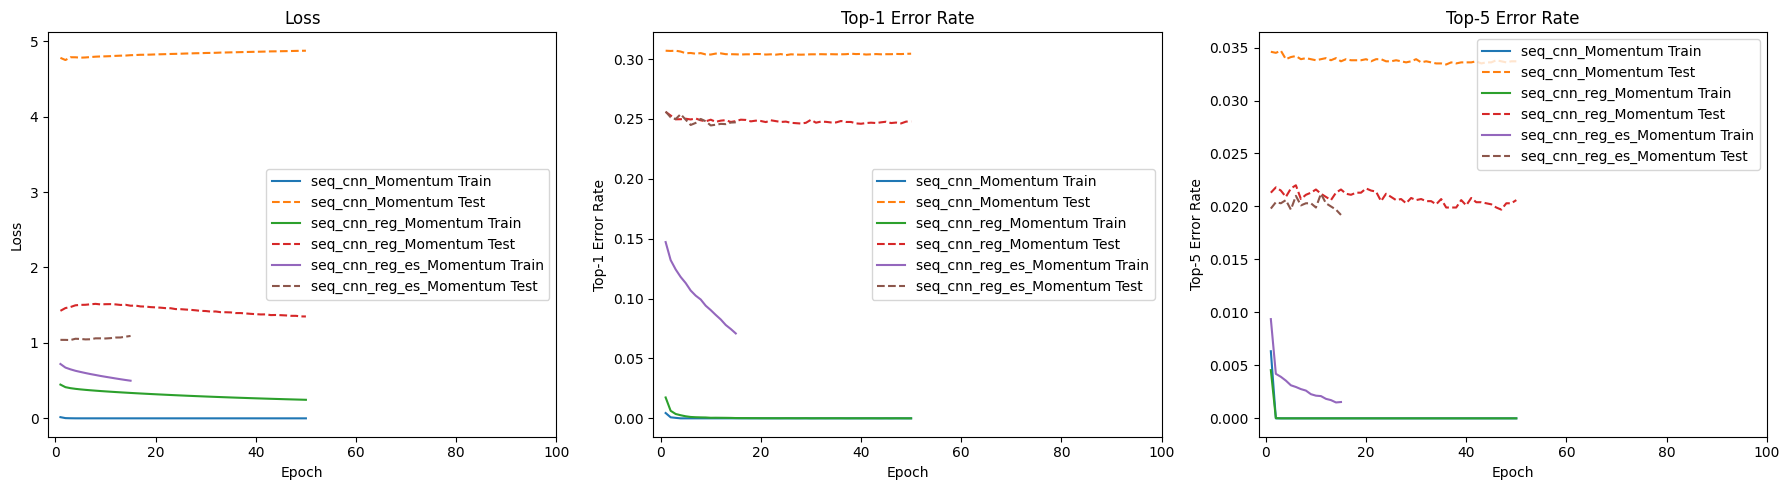

In [20]:
model_dataframes = {
    'seq_cnn_Momentum': pd.read_csv("/content/seq_cnn.csv").query("Optimizer == 'Momentum'"),
    'seq_cnn_reg_Momentum': pd.read_csv("/content/seq_cnn_reg.csv").query("Optimizer == 'Momentum'"),
    'seq_cnn_reg_es_Momentum': pd.read_csv("/content/seq_cnn_reg_es.csv").query("Optimizer == 'Momentum'")
}

# Select the relevant data for each model
models = ['seq_cnn_Momentum', 'seq_cnn_reg_Momentum', 'seq_cnn_reg_es_Momentum']

# Define the metrics to plot
metrics = {
    'Loss': ['Train_Loss', 'Val_Loss'],
    'Top-1 Error Rate': ['Top1_Train_Error', 'Top1_Val_Error'],
    'Top-5 Error Rate': ['Top5_Train_Error', 'Top5_Val_Error']
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
axes = axes.flatten()

# Plot each metric
for i, (title, metric_list) in enumerate(metrics.items()):
    ax = axes[i]

    for model in model_dataframes.keys():
        df = model_dataframes[model]

        # Plot the training and validation metrics
        ax.plot(df['Epoch'], df[metric_list[0]], label=f'{model} Train')
        ax.plot(df['Epoch'], df[metric_list[1]], label=f'{model} Test', linestyle='--')

    # Set title and labels for each plot
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.legend()
    ax.set_xticks(range(0, 101, 20))
    ax.grid(False)

plt.tight_layout()
plt.show()

## **Conclusion**
1. **seq_cnn_Momentum:**
- Training: Very low training loss (0.0005) and top-1 error rate (0.0001), indicating almost perfect performance on the training data.
- Test: However, the test loss is significantly higher (4.8307) with a top-1 error rate of 0.3043. This stark contrast between training and test performance indicates severe overfitting. The model memorized the training data but failed to generalize to unseen data.

2. **seq_cnn_reg_Momentum:**
- Training: The introduction of regularization increased the training loss (0.3110) and top-1 error rate (0.0008) compared to the base model. This is expected as regularization typically penalizes model complexity to improve generalization.
- Test: The test loss (1.4389) and top-1 error rate (0.2481) are lower than those of seq_cnn_Momentum, indicating improved generalization. The regularization helped reduce overfitting, as evidenced by the smaller gap between training and test performance.

3. **seq_cnn_reg_es_Momentum:**
- Training: The model with both regularization and early stopping shows the highest training loss (0.5839) and top-1 error rate (0.1013). This is because early stopping prevents the model from overfitting by halting training once the validation performance plateaus.
- Test: It achieves the lowest test loss (1.0588) and similar top-1 error rate (0.2484) to seq_cnn_reg_Momentum. This model offers the least amount of overfitting, due to the smallest gap between the training loss and test loss, and thus is the most generalizable model.

### **Overall, the Sequential CNN model with regularization, early stopping and momentum optimizer provides best generalization (least overfitting model) with a top-1 test error rate of 0.2484.**

# ResNet Models

## Data Preparation & Hyperparameter Initialization

In [2]:
from tensorflow.keras import layers
from keras.datasets import cifar10

# Optimizer names & list
optimizer_names = ['SGD', 'AdaGrad', 'RMSprop', 'Momentum', 'Adam']
learning_rate = 0.001

optimizer_list = [
    optimizers.SGD(learning_rate=learning_rate),      # Mini-batch Gradient Descent
    optimizers.Adagrad(learning_rate=learning_rate),  # Mini-batch AdaGrad
    optimizers.RMSprop(learning_rate=learning_rate),  # Mini-batch RMSProp
    optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True), # SGD with momentum and Nesterov acceleration
    optimizers.Adam(learning_rate=learning_rate)      # Mini-batch Adam
]

# Constants and Configurations
IMG_WIDTH = 224
IMG_HEIGHT = 224
N_CLASSES = 10
BATCH_SIZE = 64
EPOCHS = 4

# Load and normalize the CIFAR-10 dataset
(data_train, label_train), (data_test, label_test) = cifar10.load_data()
data_train, data_test = data_train / 255.0, data_test / 255.0

# Function to resize images on the fly
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    return image, label

# Create a tf.data.Dataset pipeline for efficient data loading and resizing
train_dataset = tf.data.Dataset.from_tensor_slices((data_train, label_train))
train_dataset = (train_dataset.shuffle(buffer_size=10000).map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

test_dataset = tf.data.Dataset.from_tensor_slices((data_test, label_test))
test_dataset = (test_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE))

## Model Architecture

This model architecture leverages transfer learning with the ResNet50 model, pre-trained on ImageNet, to classify images from the CIFAR-10 dataset. We further use various configurations of three training methods: dropout, regularization and 5 optimizers (SGD, AdaGrad, RMSprop, Momentum, Adam), to enhance generalization and prevent overfitting.

1.   ResNet50's deep architecture with 50 layers makes it a strategic model choice because the layers efficiently learns complex features through residual connections, which help mitigate the vanishing gradient problem.

2. Since ResNet50 was originally trained on 224x224 pixel images, an upsampling layer is used to resize the smaller 32x32 CIFAR-10 images, ensuring compatibility with the input requirements for the ResNet model. Moreover, this upsampling significantly helped improve model performance.

3. The final classification layer from ResNet50 is removed because the ImageNet classes differ from CIFAR-10 categories. We created a custom classifier module with Global Average Pooling to reduce dimensionality while retaining spatial information, followed by Dense layers with ReLU activations for non-linearity and a softmax layer for the final 10 CIFAR-10 categories.

2.   L2 regularization is applied to the dense layers and are each followed by a Dropout layer (rate = 0.5) to combat model complexity and overfitting. , promoting weight sparsity and reducing model complexity, considering the massive size of the training dataset.


**Overall, using the ResNet50 functional API in Keras provided flexibility in defining more complex architectures; useful for combining transfer learning with the required customization to achieve excellent training and test results on the CIFAR-10 dataset.**

In [3]:
from tensorflow.keras import regularizers

def classifier_module(inputs, dropout=False, regularization=False, dropout_rate=0.5, l2_strength=0.001):
    '''
    Defines the final dense layers followed by the softmax layer for classification.
    - inputs: The input tensor to the classification layers.
    - dropout: Boolean to indicate whether dropout layers are activated.
    - regularization: Boolean to indicate whether regularization is activated.
    - l2_strength: The strength of L2 regularization.

    Returns:
    - The output tensor after the dense layers.
    '''

    # Regularization == True
    if regularization:
        x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
        x = tf.keras.layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
        x = tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
        x = tf.keras.layers.Dense(N_CLASSES, activation="softmax", name="classification")(x)

    # Dropout == True
    elif dropout:
        x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
        x = tf.keras.layers.Dense(1024, activation="relu")(x)
        x = tf.keras.layers.Dropout(0.5)(x)  # Dropout after activation
        x = tf.keras.layers.Dense(512, activation="relu")(x)
        x = tf.keras.layers.Dropout(0.5)(x)  # Dropout after activation
        x = tf.keras.layers.Dense(N_CLASSES, activation="softmax", name="classification")(x)

    # No Dropout or Regularization
    else:
        x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
        x = tf.keras.layers.Dense(1024, activation="relu")(x)
        x = tf.keras.layers.Dense(512, activation="relu")(x)
        x = tf.keras.layers.Dense(N_CLASSES, activation="softmax", name="classification")(x)

    return x

In [4]:
# Builds a ResNet50-based classification model with the specified input shape and hyperparameters
def construct_resnet50_model(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), dropout_bool=False, reg_bool=False) -> tf.keras.Model:
    '''
    Builds a ResNet50-based classification model with the specified input shape and hyperparameters.
    - input_shape: The shape of the input images (height, width, channels).
    - dropout_bool: Boolean to indicate whether dropout layers are activated.
    - reg_bool: Boolean to indicate whether regularization is activated.

    Returns:
    - model: A compiled Keras model.
    '''

    inputs = tf.keras.Input(shape=input_shape)

    # ResNet50 base model, pre-trained on ImageNet
    resnet_features = tf.keras.applications.ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')(inputs)

    # Classifier module (fully connected layers)
    classification_output = classifier_module(resnet_features, dropout=dropout_bool, regularization=reg_bool)

    # Build and compile the model
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)

    return model

## Training ResNet Models

In [5]:
def train_model(model, train_ds, val_ds, model_name='model', early_stopping=False):
    # Arrays to store training and validation performance
    hist_acc_nn = []
    hist_val_acc_nn = []
    hist_loss_nn = []
    hist_val_loss_nn = []
    top5_acc_nn = []
    val_top5_acc_nn = []

    start = time.time()

    top5_acc = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top5_acc")

    # Iterate over optimizers and train the network
    for item, name in zip(optimizer_list, optimizer_names):
        print(f"-----------------------------\nDoing {name} optimizer\n-----------------------------")

        # Get the model with specified regularization and dropout options
        model.compile(optimizer=item, loss='sparse_categorical_crossentropy', metrics=['accuracy', top5_acc])

        if early_stopping:
            es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
            history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, verbose=True, callbacks=[es])
            # history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size, validation_data=(data_test, label_test), callbacks=[es])
        else:
            history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds, verbose=True)
            # history = model.fit(data_train, label_train, epochs=n_epochs, batch_size=batch_size, validation_data=(data_test, label_test))

        # Store the performance
        hist_acc_nn.append(history.history['accuracy'])
        hist_val_acc_nn.append(history.history['val_accuracy'])
        hist_loss_nn.append(history.history['loss'])
        hist_val_loss_nn.append(history.history['val_loss'])
        top5_acc_nn.append(history.history['top5_acc'])
        val_top5_acc_nn.append(history.history['val_top5_acc'])

        print("-----------------------------")

    end = time.time()
    time_nn = (end - start) / 60
    print('Minutes to run: ', time_nn)

    top1_err_nn = [[1 - acc for acc in optimizer] for optimizer in hist_acc_nn]
    val_top1_err_nn = [[1 - acc for acc in optimizer] for optimizer in hist_val_acc_nn]

    top5_err_nn = [[1 - acc for acc in optimizer] for optimizer in top5_acc_nn]
    val_top5_err_nn = [[1 - acc for acc in optimizer] for optimizer in val_top5_acc_nn]

    # Prepare data for DataFrame
    data_dict = {
        "Epoch": [],
        "Optimizer": [],
        "Train_Accuracy": [],
        "Val_Accuracy": [],
        "Train_Loss": [],
        "Val_Loss": [],
        "Top1_Train_Error": [],
        "Top1_Val_Error": [],
        "Top5_Train_Error": [],
        "Top5_Val_Error": [],
    }

    for i, optimizer_name in enumerate(optimizer_names):
        n_epochs = len(hist_acc_nn[i])

        for epoch in range(n_epochs):
            data_dict["Epoch"].append(epoch + 1)
            data_dict["Optimizer"].append(optimizer_name)
            data_dict["Train_Accuracy"].append(hist_acc_nn[i][epoch])
            data_dict["Val_Accuracy"].append(hist_val_acc_nn[i][epoch])
            data_dict["Train_Loss"].append(hist_loss_nn[i][epoch])
            data_dict["Val_Loss"].append(hist_val_loss_nn[i][epoch])
            data_dict["Top1_Train_Error"].append(top1_err_nn[i][epoch])
            data_dict["Top1_Val_Error"].append(val_top1_err_nn[i][epoch])
            data_dict["Top5_Train_Error"].append(top5_err_nn[i][epoch])
            data_dict["Top5_Val_Error"].append(val_top5_err_nn[i][epoch])

    # Convert the dictionary into a DataFrame
    df = pd.DataFrame(data_dict)

    # Write the DataFrame to a CSV file
    df.to_csv(f"{model_name}.csv", index=False)

### ResNet

In [ ]:
# Clear previous sessions and build the model
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=False, reg_bool=False)
print(model.summary())

# Train the model using the dataset pipeline
train_model(model, train_dataset, test_dataset, 'res', early_stopping=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 500s 589ms/step - accuracy: 0.4119 - loss: 1.7860 - top5_acc: 0.8281 - val_accuracy: 0.2032 - val_loss: 2.3880 - val_top5_acc: 0.7339
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 460s 568ms/step - accuracy: 0.8218 - loss: 0.5735 - top5_acc: 0.9923 - val_accuracy: 0.8282 - val_loss: 0.5064 - val_top5_acc: 0.9936
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 568ms/step - accuracy: 0.8868 - loss: 0.3494 - top5_acc: 0.9967 - val_accuracy: 0.8784 - val_loss: 0.3577 - val_top5_acc: 0.9960
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 484s 545ms/step - accuracy: 0.9175 - loss: 0.2581 - top5_acc: 0.9983 - val_accuracy: 0.8838 - val_loss: 0.3497 - val_top5_acc: 0.9964
-----------------------------
-----------------------------
Doing AdaGrad optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 597ms/step - accuracy: 0.9325 - loss: 0.2043 - top5_acc: 0.9980 -

### ResNet + Dropout

In [ ]:
# SGD, AdaGrad, RMSProp (re-run optimizer_names, optimizer_list, train_model)
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=True, reg_bool=False)
print(model.summary())
train_model(model, train_dataset, test_dataset, 'res_drop', early_stopping=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 480s 563ms/step - accuracy: 0.1956 - loss: 2.3569 - top5_acc: 0.6506 - val_accuracy: 0.2267 - val_loss: 2.1457 - val_top5_acc: 0.7321
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 433s 554ms/step - accuracy: 0.6014 - loss: 1.1629 - top5_acc: 0.9488 - val_accuracy: 0.7881 - val_loss: 0.6500 - val_top5_acc: 0.9867
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 451s 576ms/step - accuracy: 0.7781 - loss: 0.6641 - top5_acc: 0.9843 - val_accuracy: 0.8696 - val_loss: 0.3960 - val_top5_acc: 0.9954
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 495s 567ms/step - accuracy: 0.8503 - loss: 0.4624 - top5_acc: 0.9922 - val_accuracy: 0.8886 - val_loss: 0.3295 - val_top5_acc: 0.9960
-----------------------------
-----------------------------
Doing AdaGrad optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 499s 589ms/step - accuracy: 0.8862 - loss: 0.3499 - top5_acc: 0.9954 -

In [6]:
# Momentum, Adam Optimizers (re-run optimizer_names, optimizer_list, train_model)
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=True, reg_bool=False)
train_model(model, train_dataset, test_dataset, 'res_drop_mom_adam', early_stopping=False)

-----------------------------
Doing Momentum optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 557s 641ms/step - accuracy: 0.5665 - loss: 1.2700 - top5_acc: 0.8775 - val_accuracy: 0.6058 - val_loss: 1.1273 - val_top5_acc: 0.9568
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 520s 629ms/step - accuracy: 0.9252 - loss: 0.2360 - top5_acc: 0.9977 - val_accuracy: 0.9158 - val_loss: 0.2621 - val_top5_acc: 0.9984
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 476s 609ms/step - accuracy: 0.9593 - loss: 0.1284 - top5_acc: 0.9992 - val_accuracy: 0.9402 - val_loss: 0.1984 - val_top5_acc: 0.9990
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 518s 630ms/step - accuracy: 0.9769 - loss: 0.0724 - top5_acc: 0.9997 - val_accuracy: 0.9338 - val_loss: 0.2390 - val_top5_acc: 0.9988
-----------------------------
-----------------------------
Doing Adam optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 576s 664ms/step - accuracy: 0.6677 - loss: 1.0693 - top5_acc: 0.9748 - va

### ResNet + Regularization

In [ ]:
# SGD, AdaGrad (re-run optimizer_names, optimizer_list, train_model)
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=False, reg_bool=True)
print(model.summary())
train_model(model, train_dataset, test_dataset, 'res_reg_sg_ada', early_stopping=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

None
-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 506s 594ms/step - accuracy: 0.4213 - loss: 3.8389 - top5_acc: 0.8158 - val_accuracy: 0.2601 - val_loss: 4.2556 - val_top5_acc: 0.6707
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 447s 572ms/step - accuracy: 0.8254 - loss: 2.6054 - top5_acc: 0.9918 - val_accuracy: 0.8681 - val_loss: 2.4503 - val_top5_acc: 0.9948
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 447s 572ms/step - accuracy: 0.8888 - loss: 2.3808 - top5_acc: 0.9967 - val_accuracy: 0.8631 - val_loss: 2.4377 - val_top5_acc: 0.9946
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 502s 573ms/step - accuracy: 0.9147 - loss: 2.2886 - top5_acc: 0.9978 - val_accuracy: 0.9078 - val_loss: 2.2957 - val_top5_acc: 0.9977
-----------------------------
-----------------------------
Doing AdaGrad optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 473s 560ms/step - accuracy: 0.9302 - loss: 2.2280 - top5_acc: 0.9983 -

In [ ]:
# RMSProp, Momentum (re-run optimizer_names, optimizer_list, train_model)
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=False, reg_bool=True)
train_model(model, train_dataset, test_dataset, 'res_reg_rms_mom', early_stopping=False)

-----------------------------
Doing RMSprop optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 493s 582ms/step - accuracy: 0.4223 - loss: 2.4944 - top5_acc: 0.8712 - val_accuracy: 0.1755 - val_loss: 3.5974 - val_top5_acc: 0.5750
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 474s 565ms/step - accuracy: 0.7546 - loss: 0.7740 - top5_acc: 0.9844 - val_accuracy: 0.6744 - val_loss: 1.1473 - val_top5_acc: 0.9534
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 433s 553ms/step - accuracy: 0.8347 - loss: 0.5438 - top5_acc: 0.9912 - val_accuracy: 0.7078 - val_loss: 1.0844 - val_top5_acc: 0.9594
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 453s 567ms/step - accuracy: 0.8722 - loss: 0.4206 - top5_acc: 0.9950 - val_accuracy: 0.8321 - val_loss: 0.5573 - val_top5_acc: 0.9885
-----------------------------
-----------------------------
Doing Momentum optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 489s 581ms/step - accuracy: 0.9184 - loss: 0.2856 - top5_acc: 0.9942 -

In [ ]:
# Adam (re-run optimizer_names, optimizer_list, train_model)
tf.keras.backend.clear_session()
model = construct_resnet50_model(dropout_bool=False, reg_bool=True)
train_model(model, train_dataset, test_dataset, 'res_reg_rms_mom', early_stopping=False)

-----------------------------
Doing Adam optimizer
-----------------------------
Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 546s 627ms/step - accuracy: 0.5311 - loss: 2.3228 - top5_acc: 0.9092 - val_accuracy: 0.4101 - val_loss: 1.9051 - val_top5_acc: 0.8302
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 454s 581ms/step - accuracy: 0.8075 - loss: 0.6601 - top5_acc: 0.9899 - val_accuracy: 0.7861 - val_loss: 0.7002 - val_top5_acc: 0.9905
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 471s 602ms/step - accuracy: 0.8652 - loss: 0.4543 - top5_acc: 0.9951 - val_accuracy: 0.7595 - val_loss: 0.7688 - val_top5_acc: 0.9810
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 601ms/step - accuracy: 0.8935 - loss: 0.3543 - top5_acc: 0.9972 - val_accuracy: 0.8292 - val_loss: 0.5700 - val_top5_acc: 0.9915
-----------------------------
Minutes to run:  32.88487972418467


## Analyzing ResNet Models

In [14]:
# List of dataframes and corresponding model names
dataframes = [
    (pd.read_csv("/content/res.csv"), "res"),
    (pd.read_csv("/content/res_drop.csv"), "res_drop"),
    (pd.read_csv("/content/res_reg.csv"), "res_reg")
]

optimizer_names = ['SGD','AdaGrad','RMSprop','Momentum','Adam']

# Columns to average
columns_to_avg = ['Train_Accuracy', 'Val_Accuracy', 'Train_Loss', 'Val_Loss', 'Top1_Train_Error', 'Top1_Val_Error', 'Top5_Train_Error', 'Top5_Val_Error']
results = []

for df, model_name in dataframes:
    for optimizer in optimizer_names:
        df_opt = df[df['Optimizer'] == optimizer]

        # Compute the average for each column
        avg_values = df_opt[columns_to_avg].mean().to_dict()
        avg_values['Model'] = f"{model_name}_{optimizer}"

        results.append(avg_values)

df_summary = pd.DataFrame(results)


# Columns for the two separate dataframes
train_columns = ['Model', 'Train_Loss', 'Top1_Train_Error', 'Top5_Train_Error']
val_columns = ['Model', 'Val_Loss', 'Top1_Val_Error', 'Top5_Val_Error']

df_train_metrics = df_summary[train_columns]
df_val_metrics = df_summary[val_columns]

# Display the tables side by side
from IPython.core.display import display_html

# Apply formatting only to numerical columns
styled_train = df_train_metrics.style \
    .format({'Train_Loss': "{:.4f}", 'Top1_Train_Error': "{:.4f}", 'Top5_Train_Error': "{:.4f}"}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}, {'selector': 'td', 'props': [('text-align', 'left')]}])

styled_val = df_val_metrics.style \
    .format({'Val_Loss': "{:.4f}", 'Top1_Val_Error': "{:.4f}", 'Top5_Val_Error': "{:.4f}"}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}, {'selector': 'td', 'props': [('text-align', 'left')]}])

display_html(
    f"""
    <div style="display: flex; justify-content: space-around;">
        <div>{styled_train.to_html()}</div>
        <div>{styled_val.to_html()}</div>
    </div>
    """,
    raw=True
)


,Model,Train_Loss,Top1_Train_Error,Top5_Train_Error
0,res_SGD,0.5990,0.1868,0.0213
1,res_AdaGrad,0.1060,0.0334,0.0005
2,res_RMSprop,0.5488,0.1854,0.0135
3,res_Momentum,0.1167,0.0396,0.0009
4,res_Adam,0.1919,0.0660,0.0012
5,res_drop_SGD,1.1616,0.3936,0.1060
6,res_drop_AdaGrad,0.2083,0.0667,0.0021
7,res_drop_RMSprop,0.7972,0.2581,0.0242
8,res_drop_Momentum,0.2752,0.0912,0.0112
9,res_drop_Adam,0.4949,0.1591,0.0104


### Based on these models, we proceed with the three best model architectures + training methods which give the highest accuracy on the test (val) set, or equivalently give the lowest top-1 test (val) error rate.
1. **ResNet with AdaGrad:** Test Accuracy = 93.32, Test Top-1 Error Rate = 0.0668, Test Top-5 Error Rate = 0.0019
2. **ResNet with AdaGrad + regularization:** Test Accuracy = 93.16, Test Top-1 Error Rate = 0.0684, Test Top-5 Error Rate = 0.0011
3. **ResNet with AdaGrad + dropout:** Test Accuracy = 92.8, Test Top-1 Error Rate = 0.0702, Test Top-5 Error Rate = 0.0015

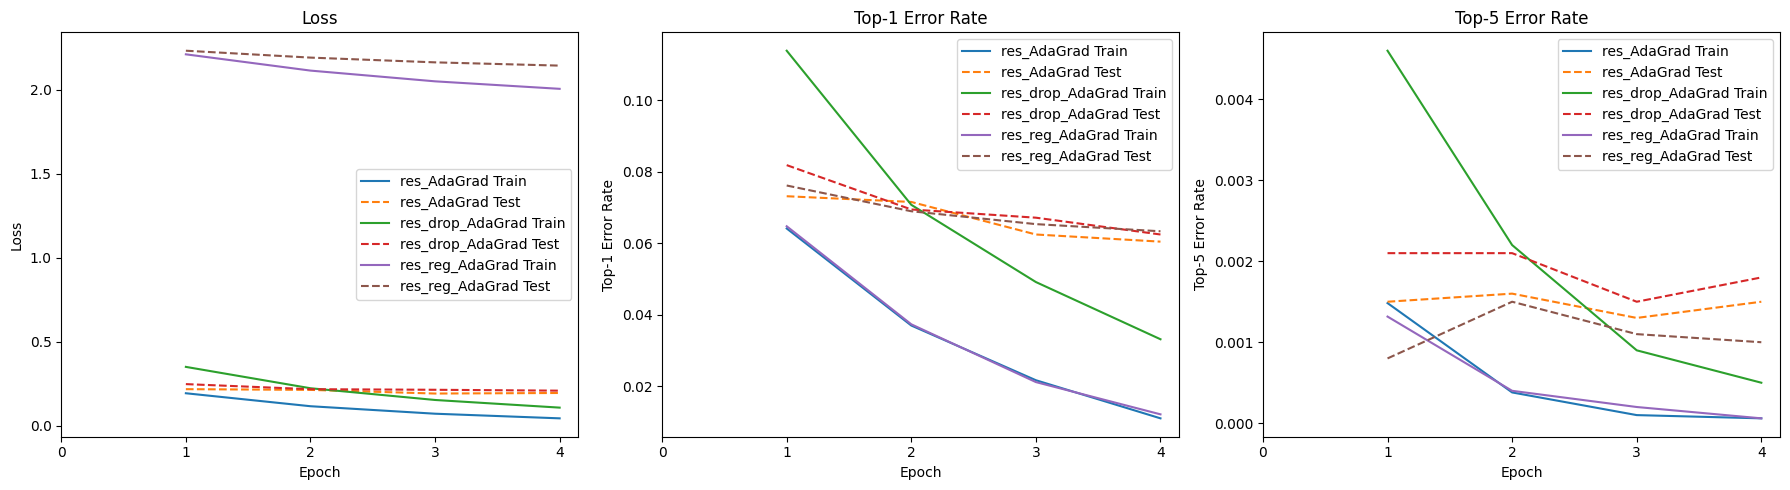

In [18]:
model_dataframes = {
    'res_AdaGrad': pd.read_csv("/content/res.csv").query("Optimizer == 'AdaGrad'"),
    'res_drop_AdaGrad': pd.read_csv("/content/res_drop.csv").query("Optimizer == 'AdaGrad'"),
    'res_reg_AdaGrad': pd.read_csv("/content/res_reg.csv").query("Optimizer == 'AdaGrad'")
}

# Select the relevant data for each model
models = ['res_AdaGrad', 'res_drop_AdaGrad', 'res_reg_AdaGrad']

# Define the metrics to plot
metrics = {
    'Loss': ['Train_Loss', 'Val_Loss'],
    'Top-1 Error Rate': ['Top1_Train_Error', 'Top1_Val_Error'],
    'Top-5 Error Rate': ['Top5_Train_Error', 'Top5_Val_Error']
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
axes = axes.flatten()

# Plot each metric
for i, (title, metric_list) in enumerate(metrics.items()):
    ax = axes[i]

    for model in model_dataframes.keys():
        df = model_dataframes[model]

        # Plot the training and validation metrics
        ax.plot(df['Epoch'], df[metric_list[0]], label=f'{model} Train')
        ax.plot(df['Epoch'], df[metric_list[1]], label=f'{model} Test', linestyle='--')

    # Set title and labels for each plot
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.legend()
    ax.set_xticks(range(0, 5, 1))
    ax.grid(False)

plt.tight_layout()
plt.show()


1. **ResNet with AdaGrad:** This model demonstrates strong learning efficiency and generalization. With a low training loss of 0.1060 and a test loss of 0.2041, we can see in the plot that the model minimises underfitting compared to the remaining two models. The Top-1 and Top-5 error rates remain minimal, indicating that the model makes highly accurate predictions. AdaGrad’s adaptive learning rate strategy allows it to perform well. Overall, this model offers a solid baseline with balanced optimization and effective performance.

2. **ResNet with Dropout + AdaGrad:** Introducing dropout to the ResNet model trained with AdaGrad results in an increase in training loss (0.2083) and test loss (0.2217), suggesting a reduction in learning efficiency. While dropout is typically useful for regularization, its benefits in this case appear minimal, as the model does not exhibit severe overfitting in the standard AdaGrad configuration. The Top-1 and Top-5 error rates slightly worsen compared to the baseline, indicating that the added dropout layers may be unnecessary.

3. **ResNet with L2 Regularization + AdaGrad:** Applying L2 regularization to ResNet with AdaGrad leads to excessively high training loss (2.0939) and test loss (2.1813), indicating underfitting. While L2 regularization is effective in preventing overfitting by penalizing large weights, the current level appears too aggressive, restricting the model’s ability to learn useful patterns. Despite these high loss values, the test error rates remain comparable to the baseline AdaGrad model, suggesting that the model still maintains classification accuracy.

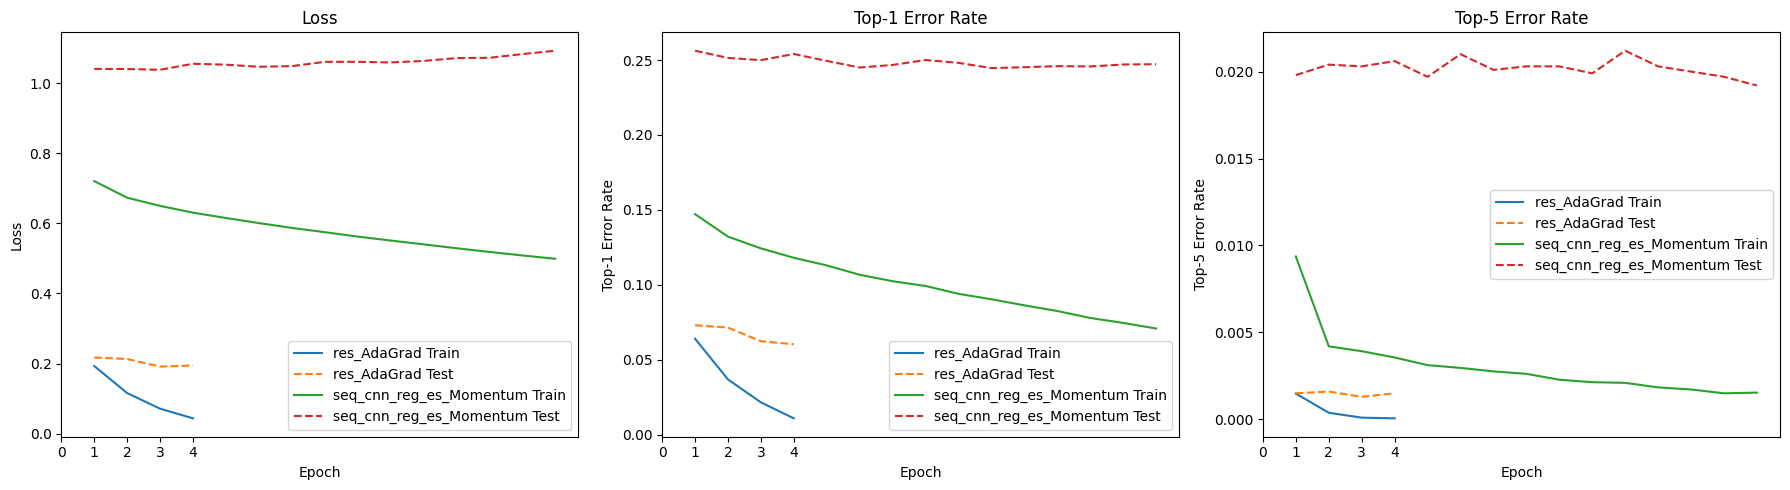

In [17]:
model_dataframes = {
    'res_AdaGrad': pd.read_csv("/content/res.csv").query("Optimizer == 'AdaGrad'"),
    'seq_cnn_reg_es_Momentum': pd.read_csv("/content/seq_cnn_reg_es.csv").query("Optimizer == 'Momentum'")
}

# Define the metrics to plot
metrics = {
    'Loss': ['Train_Loss', 'Val_Loss'],
    'Top-1 Error Rate': ['Top1_Train_Error', 'Top1_Val_Error'],
    'Top-5 Error Rate': ['Top5_Train_Error', 'Top5_Val_Error']
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
axes = axes.flatten()

# Plot each metric
for i, (title, metric_list) in enumerate(metrics.items()):
    ax = axes[i]

    for model in model_dataframes.keys():
        df = model_dataframes[model]

        # Plot the training and validation metrics
        ax.plot(df['Epoch'], df[metric_list[0]], label=f'{model} Train')
        ax.plot(df['Epoch'], df[metric_list[1]], label=f'{model} Test', linestyle='--')

    # Set title and labels for each plot
    ax.set_title(title)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(title)
    ax.legend()
    ax.set_xticks(range(0, 5, 1))
    ax.grid(False)

plt.tight_layout()
plt.show()


## **OVERALL CONCLUSION: BEST MODEL FOR CIFAR-10 IMAGE CLASSIFICATION**

ResNet with AdaGrad outperforms the Sequential CNN with Momentum + Regularization + Early Stopping by achieving higher accuracy (93.32 vs. 75.16) and lower Top-1 error rates (0.0668 vs. 0.2484), thanks to its adaptive learning rate and deeper architecture, which enhance learning efficiency and generalization. In contrast, the Sequential CNN benefits from regularization and early stopping to reduce overfitting but struggles with accuracy due to its simpler architecture.

### **Overall, ResNet with AdaGrad provides better performance, making it the superior model for this task.**



# P3. Permutation equivariant neural networks

In this architecture, we are constructing a permutation equivariant neural network that processes input matrices of size m x d and output matrices of size $m * v$,  $v \in \{1,...,d'\} $. The design of this architecture is guided by the affine permutation equivariant transformation equation, which holds for$j \in \{1,…,m\} $, $v \in \{1,…,d’\}$:

$$
f_{j,v}(x) = \sum_{u=1}^d a_{u,v}x_{j,u} + \sum_{u=1}^d b_{u,v} (m^{-1}\sum_{i=1}^m x_{i,u}) + c_v
$$


1.   The first term: $\sum_{u=1}^d a_{u,v}x_{j,u}$ involves summing over the input number of columns d while keeping the row fixed. To compute this we define a convolutional layer with kernel of size $1 \times d$, which spans 1 row and all $d$ columns of the input. The stride is also set at $1 \times d$, since the kernel will slide 1 row at a time and $d$ columns at a time. Since the width of the input is $d$ columns, the kernel will only shift across rows, leading to a row-wise summation (e.g. summing $x_{11}, x_{12},\ldots,x_{1d}$) as dictated by the first term. We include a bias term in this convolution to incorporate the constant, third term $c_v$. Since the coefficients $a_{u,v}$ vary over both the input columns $u$ and output channels $v$, we specify $d’$ number of output channels. Overall, this convolution layer produces outcome of the shape $(5, 1, d’)$ for (output height, output width, output channels), and thus we convert it to $d’$ column vectors by reshaping it to $(5, d’, 1)$.

2.   The second term $\sum_{u=1}^d b_{u,v} (m^{-1}\sum_{i=1}^m x_{i,u})$ consists of two parts. Firstly, the brackets indicate that we take an average while fixing the columns and iterating through the rows, which is calculated using an average pooling layer. We set the pool size to $(m,1)=(5,1)$ and also stride to $(m,1)=(5,1)$; since the height of the input is 5 rows, the kernel will move across the entire input in d steps (i.e. average of $x_{11},x_{21},x_{31},x_{41},x_{51},\ldots,$ average of $x_{1d},x_{2d},x_{3d},x_{4d},x_{5d}$). The output will be $1\times d$ row vector, which gets fed into another convolutional layer with the same kernel size, stride and number of output channels as the first convolutional layer (kernel size = $(1,d)$, stride = $(1,d)$, output channels = $d’$). We exclude the bias term term since it was already handled in the first convolutional layer. The output of this convolution is a scalar for each output channel $v$, but since the value is identical across all rows, we repeat this vector $m$ times to match the required output shape. The repeated vectors are then reshaped into a matrix form consistent with the dimensions of the first term.

3. Finally, the two parts are combined by adding them element-wise, and a ReLU activation function is applied to introduce non-linearity. This produces a permutation equivariant layer capable of handling inputs where the order of rows does not matter, preserving symmetry across permutations of the input rows. If this is not the final layer, the ReLU activation is applied to ensure the network maintains its non-linear capability.


## Data Importing & Reshaping

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Load and reshape the data, dropping the first column
x_train = pd.read_csv("xtrain-2.csv", usecols=range(1, 16)).values
x_train = x_train.reshape(-1, 5, 3, 1)

y_train = pd.read_csv("ytrain-2.csv", usecols=range(1, 6)).values

x_test = pd.read_csv("xtest-2.csv", usecols=range(1, 16)).values
x_test = x_test.reshape(-1, 5, 3, 1)

y_test = pd.read_csv("ytest-2.csv", usecols=range(1, 6)).values

# Verify the shapes
print("x_train shape:", x_train.shape)  # Should be (200000, 5, 3, 1)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)

x_train shape: (200000, 5, 3, 1)
y_train shape: (200000, 5)
x_test shape: (200000, 5, 3, 1)
y_train shape: (200000, 5)


## Model Architecture

### Modelling the Affine Transformation Layers

In [ ]:
def L(input_layer, d, d_prime, layer_num, end=False):
    """
    Returns a permutation equivariant layer with specified number of new dimensions.
    """

    # PART 1: EQUATION 1
    # Consider the base case: m = 5, d = 3, d_prime = 2

    # d_prime: 2; kernel_size: (1,d) = (1,3), strides: (1,d) = (1,3); bias: set to True by default
    cnn_1 = keras.layers.Conv2D(filters=d_prime, kernel_size = (1,d), strides=(1,d), padding="valid", name=f"CNN_1{layer_num}", use_bias=True)(input_layer)
    A = keras.layers.Reshape((5, d_prime, 1), name=f"Reshape_To_Output{layer_num}")(cnn_1)

    # PART 2: EQUATION 2
    # Average Pooling: pool_size = (m,1) = (5,1), strides: (m,1)=(5,1)
    pool_2 = keras.layers.AveragePooling2D(pool_size=(5, 1), strides=(5, 1), padding="valid", name=f"Average_Pooling{layer_num}")(input_layer)

    # The output will be 1xd row vector, bias: set to False (because we already applied the bias term above)
    cnn_2 = keras.layers.Conv2D(filters=d_prime, kernel_size=(1,d), strides=(1,d), padding="valid", use_bias=False, name=f"CNN_2{layer_num}")(pool_2)

    # Converts multi-dimensional output of cnn_2 into a 1D vector, since RepeatVector layer only accepts 2D inputs
    flatten = keras.layers.Flatten(name=f"Part_B_Flatten{layer_num}")(cnn_2)

    # Repeat vector 5 times (one for each row in the original input)
    repeat = keras.layers.RepeatVector(5,name=f"Part_B_Repeat{layer_num}")(flatten)
    B = keras.layers.Reshape((5, d_prime, 1),name=f"Part_B_Reshape{layer_num}")(repeat)

    # Adds part 1 and part 2 of the affine transformation equation elementwise
    output = keras.layers.Add(name=f"addA_B{layer_num}")([A, B])

    if not end:
        output = keras.layers.ReLU()(output)

    return output


### Defining the full model for all layers

In [ ]:
def full_model(n_layers, d, d_prime, input_shape, name):
    """
    Builds a model with n_layers using the L function.
    """
    input_layer = keras.layers.Input(shape=input_shape)

    # First layer
    layer_output = L(input_layer=input_layer, d=d, d_prime=d_prime, layer_num=0)

    # Iterate through the additional layers
    for layer_num in range(1, n_layers):
        layer_output = L(input_layer=layer_output, d=d_prime, d_prime=d_prime, layer_num=layer_num)

    # Final layer (no ReLU)
    final_layer = L(input_layer=layer_output, d=d_prime, d_prime=1, layer_num="end", end=True)

    model = keras.Model(inputs=input_layer, outputs=final_layer, name=name)

    return model

## Model Training for all (L,w) combinations

In [ ]:
INPUT_SHAPE = (5,3,1)
OG_COLUMNS = 3
LEARNING_RATE = 1e-4
EPSILON = 1e-3
BATCH_SIZE = 300
EPOCHS = 100
VAL_SPLIT = 0.1

params = [(5,2),(2,10),(2,100),(2,200),(3,5),(3,10),(3,100),(3,200)]
models = []
for param_set in params:
    models.append(full_model(n_layers=param_set[0], d_prime=param_set[1], input_shape=INPUT_SHAPE, d=OG_COLUMNS, name=f"L{param_set[0]}_w{param_set[1]}"))

In [ ]:
loss_dict = {}
mse_dict = {}

for param_set, model in zip(params, models):
    print(f"train this model: {model.name}")

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE, epsilon=EPSILON), loss="mse", metrics=['mse',])
    history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT)

    loss_dict[param_set] = {
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss']
    }

    # Test Evaluation
    y_pred = model.predict(x_test)
    y_pred_reshaped = y_pred.reshape(y_test.shape)
    print("y_test shape:", y_test.shape)
    print("y_pred shape:", y_pred_reshaped.shape)

    test_mse = mean_squared_error(y_test, y_pred_reshaped)
    mse_dict[param_set]= {
        'Training MSE': history.history['mse'],
        'Validation MSE': history.history['val_mse']
    }

    print(f"Test MSE for {param_set}: {test_mse}")

train this model: L5_w2
Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2222 - mse: 0.2222 - val_loss: 0.1850 - val_mse: 0.1850
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1809 - mse: 0.1809 - val_loss: 0.1714 - val_mse: 0.1714
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1695 - mse: 0.1695 - val_loss: 0.1647 - val_mse: 0.1647
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1637 - mse: 0.1637 - val_loss: 0.1615 - val_mse: 0.1615
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1612 - mse: 0.1612 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1600 - val_mse: 0.1600
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1600 - val_mse: 0.1600
Epoch 9/100
600/600 ━━━━

## Analysis of Final Results

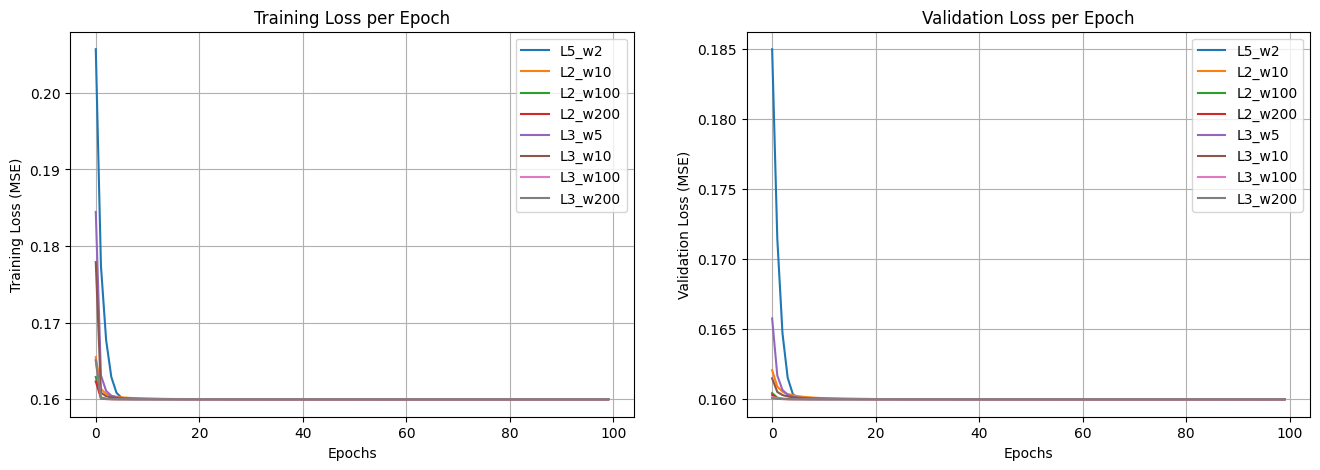

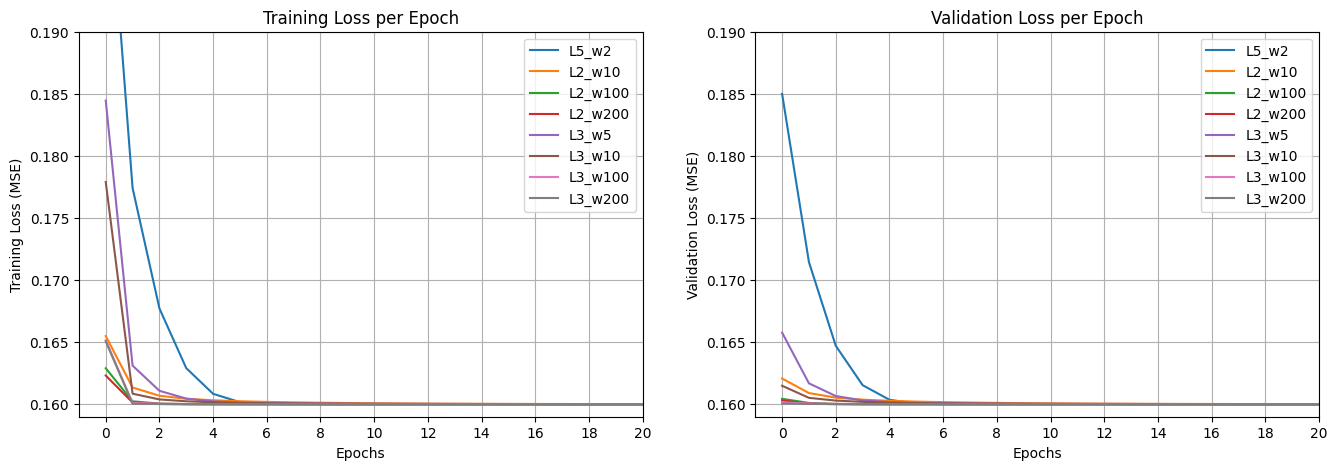


Test MSE values for each param_set:
L5_w2: 0.1600000262260437
L2_w10: 0.16000081598758698
L2_w100: 0.1600007861852646
L2_w200: 0.16000020503997803
L3_w5: 0.16000014543533325
L3_w10: 0.16000154614448547
L3_w100: 0.1600000560283661
L3_w200: 0.1600000113248825


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. Plot Training Loss per Epoch for all param_set
for param_set, losses in loss_dict.items():
    axes[0].plot(losses['Training Loss'], label=f"L{param_set[0]}_w{param_set[1]}")
axes[0].set_title('Training Loss per Epoch')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training Loss (MSE)')
axes[0].legend()
axes[0].grid(True)

# 2. Plot Validation Loss per Epoch for all param_set
for param_set, losses in loss_dict.items():
    axes[1].plot(losses['Validation Loss'], label=f"L{param_set[0]}_w{param_set[1]}")
axes[1].set_title('Validation Loss per Epoch')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss (MSE)')
axes[1].legend()
axes[1].grid(True)

plt.show()


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 3. Plot Training Loss per Epoch for all param_set, restricted x_lim, y_lim (zoomed in)
for param_set, losses in loss_dict.items():
    axes[0].plot(losses['Training Loss'], label=f"L{param_set[0]}_w{param_set[1]}")
axes[0].set_title('Training Loss per Epoch')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training Loss (MSE)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(bottom=0.159, top=0.19)
axes[0].set_xlim(left=-1, right=20)
axes[0].set_xticks(range(0, 21, 2))  # Set integer ticks every 2 epochs

# 4. Plot Validation Loss per Epoch for all param_set, restricted x_lim, y_lim (zoomed in)
for param_set, losses in loss_dict.items():
    axes[1].plot(losses['Validation Loss'], label=f"L{param_set[0]}_w{param_set[1]}")
axes[1].set_title('Validation Loss per Epoch')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss (MSE)')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(bottom=0.159,top=0.19)
axes[1].set_xlim(left=-1, right=20)
axes[1].set_xticks(range(0, 21, 2))  # Set integer ticks every 2 epochs

plt.show()

# 5. Print Test MSE for each param_set
print("\nTest MSE values for each param_set:")
for param_set, mse_values in mse_dict.items():
    print(f"L{param_set[0]}_w{param_set[1]}: {mse_values['Validation MSE'][-1]}")

We have provided plots for the training and validation loss per epoch, across the different combinations for layers 𝐿 and output dimensions 𝑤. The performance of the model appears to be relatively similar across all combinations, and thus we provide a closer look at the differences between the models by focusing only on the first 20 epochs. Initial observations show that increasing the number of layers 𝐿 and output dimensions 𝑤 does not have a significant impact on the training/validation loss nor the test MSE, which all converge to 0.160 for all combinations. This suggests that increasing model depth or capacity does not enhance generalization for this particular task.

1. **Effect of increasing the number of layers (L):** Moving from L=2 to L=3 or L=5 does not significantly reduce the training or validation loss. The losses converge quickly and plateau at similar values across all configurations. This suggests that increasing depth does not enhance learning for this specific task, likely because the problem is not complex enough to benefit from additional layers. The slight variations observed may be due to optimization noise rather than meaningful performance gains.

2. **Effect of increasing the output channels / dimensions (w):** Higher dimensions generally lead to faster convergence in the initial epochs. For instance, models with w=100 or w=200 reach lower training losses faster than those with w=2 or w=10. Despite faster convergence, increasing w beyond 100 provides diminishing returns, indicating the model already captures the necessary features with w=100.

3. **Generalization and Overfitting:** There is no significant gap between training and validation losses across all configurations, indicating no overfitting. The test MSE values are all approximately 0.160, further supporting the model's generalization capability regardless of L or w.
Model Capacity and Complexity:

### **Final Conclusion on best performing model:**

The best test MSE is observed for L3_w200 (0.1600000113248825), followed closely by L3_w100 (0.1600000560283661). **This indicates that L=3 and w=100 is the most efficient configuration, balancing complexity and performance.** Adding more layers or dimensions beyond L=3 and w=100 does not improve performance, highlighting the importance of having a non-redundant, parsimonious model.

